## Load necessary libraries

In [9]:
# For working with data
import pandas as pd

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For machine learning modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Load the Data

In [10]:
# Load the Credit Card Fraud Detection dataset (assuming it's in the same directory as this notebook)
file_path = "C:/Users/n518s/OneDrive/Documents/MAT311-Final-Project-Draft/customer_churn_main/data/raw/train.csv"
churn_data_raw = pd.read_csv(file_path)

# Display the first few rows of the dataset and general information
churn_data_raw.head()



,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Customer Status,Last Due Date,Last Payment Date,Churn
0,321685,47,Male,52.0,9,4,10.0,Basic,Quarterly,738.64,NaN,active,06-28,07-08,0
1,407818,45,Female,13.0,16,1,0.0,Standard,Annual,822.72,NaN,active,06-26,06-26,0
2,250306,33,Female,NaN,29,6,NaN,Basic,Quarterly,462.62,29.0,inactive,06-29,07-02,1
3,308397,40,Male,13.0,25,3,4.0,Basic,Quarterly,516.91,1.0,active,06-30,07-04,0
4,298181,38,Male,18.0,16,2,2.0,Premium,Annual,896.28,NaN,active,06-18,06-20,0


In [11]:
churn_data_raw.shape

(303124, 15)

In [12]:
churn_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303124 entries, 0 to 303123
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         303124 non-null  int64  
 1   Age                303124 non-null  int64  
 2   Gender             303124 non-null  object 
 3   Tenure             241267 non-null  float64
 4   Usage Frequency    303124 non-null  int64  
 5   Support Calls      240804 non-null  object 
 6   Payment Delay      214785 non-null  float64
 7   Subscription Type  303124 non-null  object 
 8   Contract Length    303124 non-null  object 
 9   Total Spend        303124 non-null  float64
 10  Last Interaction   240717 non-null  float64
 11  Customer Status    303124 non-null  object 
 12  Last Due Date      303124 non-null  object 
 13  Last Payment Date  303124 non-null  object 
 14  Churn              303124 non-null  int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 34

In [13]:
churn_data_raw.describe()

,CustomerID,Age,Tenure,Usage Frequency,Payment Delay,Total Spend,Last Interaction,Churn
count,303124.000000,303124.000000,241267.000000,303124.000000,214785.000000,303124.000000,240717.000000,303124.000000
mean,302495.086024,38.464872,31.536149,15.944221,10.257499,666.817412,14.043258,0.299999
std,129863.999792,11.669990,17.216746,8.543779,6.568484,223.308042,8.525500,0.458258
min,2.000000,18.000000,1.000000,1.000000,0.000000,100.000000,1.000000,0.000000
25%,226791.250000,29.000000,17.000000,9.000000,5.000000,540.000000,7.000000,0.000000
50%,324773.500000,39.000000,32.000000,16.000000,10.000000,693.010000,13.000000,0.000000
75%,405050.250000,47.000000,46.000000,23.000000,15.000000,846.280000,21.000000,1.000000
max,505204.000000,65.000000,60.000000,30.000000,30.000000,1000.000000,30.000000,1.000000


## Data Wrangling

In [14]:
churn_data_raw.isnull().sum()

CustomerID               0
Age                      0
Gender                   0
Tenure               61857
Usage Frequency          0
Support Calls        62320
Payment Delay        88339
Subscription Type        0
Contract Length          0
Total Spend              0
Last Interaction     62407
Customer Status          0
Last Due Date            0
Last Payment Date        0
Churn                    0
dtype: int64

In [15]:
churn_data_raw.dtypes

CustomerID             int64
Age                    int64
Gender                object
Tenure               float64
Usage Frequency        int64
Support Calls         object
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Customer Status       object
Last Due Date         object
Last Payment Date     object
Churn                  int64
dtype: object

In [16]:
# impute missing numeric values with the median of the respective columns
cleanup_df = churn_data_raw.fillna(churn_data_raw.mode())

In [17]:
cleanup_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Customer Status,Last Due Date,Last Payment Date,Churn
0,321685,47,Male,52.0,9,4,10.0,Basic,Quarterly,738.64,7.0,active,06-28,07-08,0
1,407818,45,Female,13.0,16,1,0.0,Standard,Annual,822.72,NaN,active,06-26,06-26,0
2,250306,33,Female,NaN,29,6,NaN,Basic,Quarterly,462.62,29.0,inactive,06-29,07-02,1
3,308397,40,Male,13.0,25,3,4.0,Basic,Quarterly,516.91,1.0,active,06-30,07-04,0
4,298181,38,Male,18.0,16,2,2.0,Premium,Annual,896.28,NaN,active,06-18,06-20,0


In [18]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on Gender column
encoder_df = pd.DataFrame(encoder.fit_transform(cleanup_df[['Gender']]).toarray())

#merge one-hot encoded columns back with original DataFrame
cleanup_df = cleanup_df.join(encoder_df)
cleanup_df.rename(columns={0: 'Female', 1: 'Male'}, inplace=True)
cleanup_df.drop('Gender', axis=1, inplace=True)


In [19]:
#replace 'none' and nan with 0 in Support Calls column
cleanup_df['Support Calls'] = cleanup_df['Support Calls'].replace('none', 0)
cleanup_df['Support Calls'] = cleanup_df['Support Calls'].fillna(0)
cleanup_df['Support Calls'] = cleanup_df['Support Calls'].astype(int)
cleanup_df['Support Calls'].unique()
# cleanup_df.head()


array([ 4,  1,  6,  3,  2,  7,  0,  9,  5, 10,  8])

In [20]:
# Cleaning Payment Delays Column
cleanup_df['Payment Delay'] = cleanup_df['Payment Delay'].fillna(-1)
cleanup_df['Payment Delay'].unique()

array([10.,  0., -1.,  4.,  2., 18., 13., 15.,  8., 17., 14.,  5., 19.,
       16., 12.,  7., 20.,  3.,  1.,  6.,  9., 11., 27., 24., 30., 25.,
       29., 28., 21., 23., 22., 26.])

In [21]:
# Cleaning Subscription Type Column
# cleanup_df['Subscription Type']
#perform one-hot encoding on Subscription Type column
encoder_df = pd.DataFrame(encoder.fit_transform(cleanup_df[['Subscription Type']]).toarray())

#merge one-hot encoded columns back with original DataFrame
cleanup_df = cleanup_df.join(encoder_df)
cleanup_df.rename(columns={0: 'Basic', 1: 'Premium', 2: 'Standard'}, inplace=True)
cleanup_df.drop('Subscription Type', axis=1, inplace=True)
cleanup_df.head()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Contract Length,Total Spend,Last Interaction,Customer Status,Last Due Date,Last Payment Date,Churn,Female,Male,Basic,Premium,Standard
0,321685,47,52.0,9,4,10.0,Quarterly,738.64,7.0,active,06-28,07-08,0,0.0,1.0,1.0,0.0,0.0
1,407818,45,13.0,16,1,0.0,Annual,822.72,NaN,active,06-26,06-26,0,1.0,0.0,0.0,0.0,1.0
2,250306,33,NaN,29,6,-1.0,Quarterly,462.62,29.0,inactive,06-29,07-02,1,1.0,0.0,1.0,0.0,0.0
3,308397,40,13.0,25,3,4.0,Quarterly,516.91,1.0,active,06-30,07-04,0,0.0,1.0,1.0,0.0,0.0
4,298181,38,18.0,16,2,2.0,Annual,896.28,NaN,active,06-18,06-20,0,0.0,1.0,0.0,1.0,0.0


In [22]:
# Cleaning Contract Length Column
#perform one-hot encoding on Contract Length column
encoder_df = pd.DataFrame(encoder.fit_transform(cleanup_df[['Contract Length']]).toarray())

#merge one-hot encoded columns back with original DataFrame
cleanup_df = cleanup_df.join(encoder_df)
cleanup_df.rename(columns={0: 'Monthly', 1: 'Quarterly', 2: 'Annual'}, inplace=True)
cleanup_df.drop('Contract Length', axis=1, inplace=True)
cleanup_df.head()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Customer Status,Last Due Date,Last Payment Date,Churn,Female,Male,Basic,Premium,Standard,Monthly,Quarterly,Annual
0,321685,47,52.0,9,4,10.0,738.64,7.0,active,06-28,07-08,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,407818,45,13.0,16,1,0.0,822.72,NaN,active,06-26,06-26,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,250306,33,NaN,29,6,-1.0,462.62,29.0,inactive,06-29,07-02,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,308397,40,13.0,25,3,4.0,516.91,1.0,active,06-30,07-04,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,298181,38,18.0,16,2,2.0,896.28,NaN,active,06-18,06-20,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [23]:
# Cleaning the Last Interaction Column
cleanup_df['Last Interaction'] = cleanup_df['Last Interaction'].fillna(-1)
cleanup_df['Last Interaction'].unique()

array([ 7., -1., 29.,  1., 22., 15.,  5., 28., 20., 24.,  3., 12., 10.,
        4., 17.,  2.,  9., 26., 11., 13., 30., 18., 14., 21.,  6., 25.,
       16.,  8., 27., 23., 19.])

In [24]:
# perform one-hot encoding on Customer Status column
encoder_df = pd.DataFrame(encoder.fit_transform(cleanup_df[['Customer Status']]).toarray())

#merge one-hot encoded columns back with original DataFrame
cleanup_df = cleanup_df.join(encoder_df)
cleanup_df.rename(columns={0: 'active', 1: 'inactive'}, inplace=True)
cleanup_df.drop('Customer Status', axis=1, inplace=True)
cleanup_df.head()


,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Last Due Date,Last Payment Date,...,Female,Male,Basic,Premium,Standard,Monthly,Quarterly,Annual,active,inactive
0,321685,47,52.0,9,4,10.0,738.64,7.0,06-28,07-08,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,407818,45,13.0,16,1,0.0,822.72,-1.0,06-26,06-26,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,250306,33,NaN,29,6,-1.0,462.62,29.0,06-29,07-02,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,308397,40,13.0,25,3,4.0,516.91,1.0,06-30,07-04,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,298181,38,18.0,16,2,2.0,896.28,-1.0,06-18,06-20,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [25]:
# Cleaning the Tenure Column
cleanup_df['Tenure'] = cleanup_df['Tenure'].fillna(-1)

In [26]:
cleanup_df.isna().sum()

CustomerID           0
Age                  0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Total Spend          0
Last Interaction     0
Last Due Date        0
Last Payment Date    0
Churn                0
Female               0
Male                 0
Basic                0
Premium              0
Standard             0
Monthly              0
Quarterly            0
Annual               0
active               0
inactive             0
dtype: int64

In [27]:
churn_data_cleaned = cleanup_df

## Visualize the Data

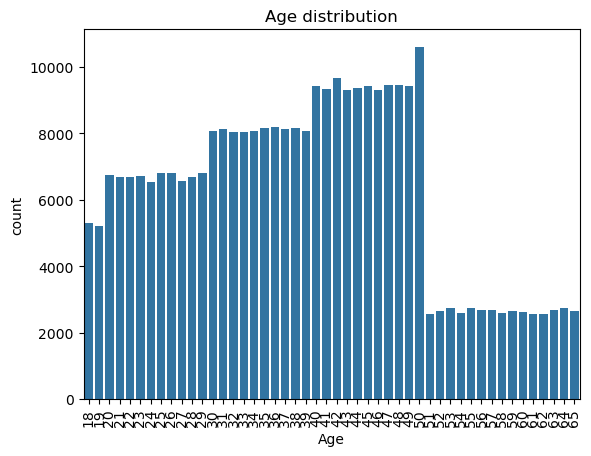

In [28]:
# Visualize the Age distribution
sns.countplot(x='Age', data=churn_data_raw)
plt.title('Age distribution')
plt.xticks(rotation=90)

plt.show()

## Data Cleaning but way better

In [29]:
from pathlib import Path
print(Path.cwd())
!dir 

c:\Users\n518s\OneDrive\Documents\MAT311-Final-Project-Draft\customer_churn_main\notebooks
 Volume in drive C is OS
 Volume Serial Number is 344B-80B1

 Directory of c:\Users\n518s\OneDrive\Documents\MAT311-Final-Project-Draft\customer_churn_main\notebooks

11/19/2025  03:23 PM    <DIR>          .
11/19/2025  04:08 PM    <DIR>          ..
11/19/2025  03:23 PM           476,671 credit_card_fraud_analysis.ipynb
11/19/2025  04:36 PM           167,357 customer_churn.ipynb
               2 File(s)        644,028 bytes
               2 Dir(s)  86,061,916,160 bytes free


In [1]:
from customer_churn_main.src.data.preprocess import clean_dataset
raw_df = pd.read_csv("data/raw/train.csv")
cleaned_df = clean_dataset(raw_df)
cleaned_df.head()

ModuleNotFoundError: No module named 'customer_churn_main'

In [ ]:
cleaned_df.isnan().sum()

## Prediction stuff

In [ ]:
def split_data(df: pd.DataFrame):
    """Split dataframe into train/validation/test sets."""
    # FIX THIS LATER
    # X = df.drop(["Churn", "Last Due Date", "Last Payment Date"], axis=1)
    # y = df["Churn"]
    X = df.drop(["Last Due Date", "Last Payment Date"], axis=1)
    y = df
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123, stratify=y
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=0.25, random_state=123, stratify=y_temp
    )
    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
# Split the data into training and testing sets
X_train, X_val, X_test, y_train, y_val, y_test = split_data(churn_data_cleaned)


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
print("---Training models...")

def train_knn_model(X_train: pd.DataFrame, y_train: pd.Series) -> KNeighborsClassifier:
    """Train and return a 3-NN classifier."""
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)
    return model

from sklearn.dummy import DummyClassifier

def train_dumb_model(X_train: pd.DataFrame, y_train: pd.Series) -> DummyClassifier:
    """Train a model that always predicts the majority class (never fraud)."""
    model = DummyClassifier(strategy="constant", constant=0)
    model.fit(X_train, y_train)
    return model

knn_model = train_knn_model(X_train, y_train)
dumb_model = train_dumb_model(X_train, y_train)


---Training models...


In [ ]:
print("---Evaluating on validation set...")
y_val_pred_knn = knn_model.predict(X_val)
y_val_pred_dumb = dumb_model.predict(X_val)

---Evaluating on validation set...


In [ ]:
val_prob_knn = knn_model.predict_proba(X_val)[:, 1]
val_prob_dumb = dumb_model.predict_proba(X_val)[:, 1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(y_true, y_score, label: str) -> float:
    """Plot a ROC curve and return the AUC."""
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc = roc_auc_score(y_true, y_score)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {label} (AUC={auc:.3f})")
    plt.legend()
    plt.tight_layout()
    plt.show()
    return auc

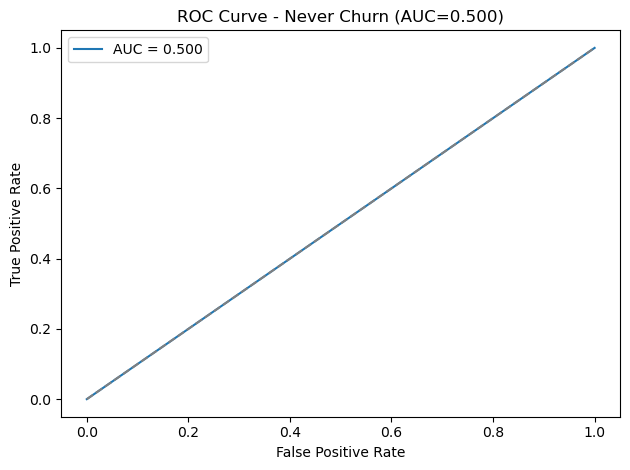

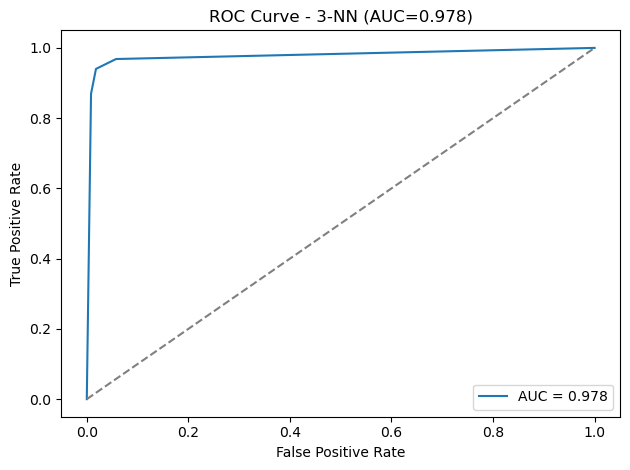

In [ ]:
auc_dumb = plot_roc_curve(y_val, val_prob_dumb, "Never Churn")
auc_knn = plot_roc_curve(y_val, val_prob_knn, "3-NN")